In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import requests
import datetime

import seaborn as sns
sns.set()

In [2]:
def df_price_OHLCV_cryptocompare(timeframe='day', symbol='BTC', comparison_symbol='USD', limit=0,
                        aggregate=1, exchange='CCCAGG', print_url=False):
    """Returns a pandas.Dataframe containing OHLC daily data for the specified
    pair of symbols

    Parameters
    ----------
        timeframe : {'day', 'hour', 'minute'}, default 'day'
            'day' : get daily data
            'hour' : get data for each hour
            'minute' : get data for each minute
        symbol : string
            currency we buy, default BTC
        comparison_symbol : string
            currency we sell, default USD
        limit : int
            0 : returns all data available
            > 0 : returns last n rows
        exchange : string, optional
            exchange which we want to get the data from
        print_url : bool, default False
            prints the url that makes the call to the API

    Returns
    ----------
        df : pandas.DataFrame
            DataFrame containing OHLCV historical data
                OHLC : Open, High, Low, Close
                Volume : Volume in the currency being bought
                Volume (...) : Volume in the currency being sold
    """

    url = 'https://min-api.cryptocompare.com/data/histo{}?fsym={}&tsym={}&limit={}&aggregate={}&e={}'\
            .format(timeframe, symbol.upper(), comparison_symbol.upper(), limit-1, aggregate, exchange)
    if not limit:
        url += '&allData=True'
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['Date'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    df.index = pd.to_datetime(df.Date)
    if timeframe == 'day':
        df.index = df.index.normalize() # so that the index has only date, not hour. Easier to merge wit other data
    df = df.drop(['Date', 'time'], axis=1)
    df.columns = ['Close', 'High', 'Low', 'Open',
                  'Volume',
                  # 'Volume']
                  'Volume ({})'.format(comparison_symbol)]
    if print_url:
        print(url)
    return df

In [3]:
bitcoin = df_price_OHLCV_cryptocompare()

In [4]:
bitcoin.shape

(2782, 6)

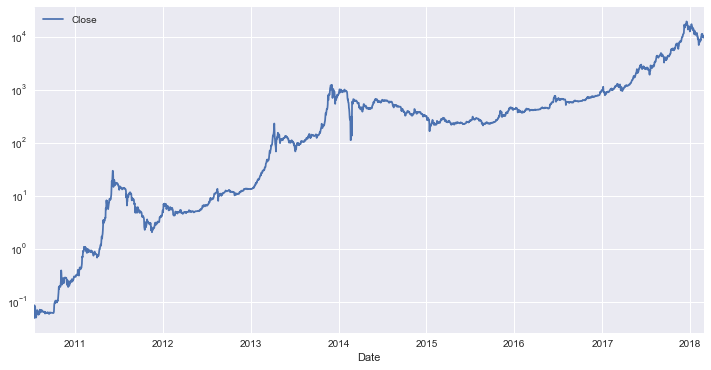

In [5]:
bitcoin.Close.plot(logy=True);
plt.legend();

In [6]:
bitcoin['Returns'] = (bitcoin['Close'].pct_change() + 1).fillna(1)
bitcoin.head()

,Close,High,Low,Open,Volume,Volume (USD),Returns
Date,,,,,,,
2010-07-17,0.04951,0.04951,0.04951,0.04951,20.00,0.9902,1.000000
2010-07-18,0.08584,0.08585,0.05941,0.04951,75.01,5.0900,1.733791
2010-07-19,0.08080,0.09307,0.07723,0.08584,574.00,49.6600,0.941286
2010-07-20,0.07474,0.08181,0.07426,0.08080,262.00,20.5900,0.925000
2010-07-21,0.07921,0.07921,0.06634,0.07474,575.00,42.2600,1.059807


In [7]:
bitcoin.tail()

,Close,High,Low,Open,Volume,Volume (USD),Returns
Date,,,,,,,
2018-02-22,9847.96,10941.57,9757.19,10481.66,175506.26,1.795952e+09,0.939542
2018-02-23,10175.51,10420.67,9604.00,9847.96,139373.76,1.399448e+09,1.033261
2018-02-24,9705.73,10528.00,9396.54,10175.51,125269.68,1.244484e+09,0.953832
2018-02-25,9610.11,9873.79,9329.44,9705.73,82430.45,7.930932e+08,0.990148
2018-02-26,10344.14,10364.01,9411.82,9610.11,72621.25,7.193527e+08,1.076381


In [8]:
decimals = 2
returns_strings = ['{:.3f}'.format(r) for r in bitcoin.Returns]

print(returns_strings)

['1.000', '1.734', '0.941', '0.925', '1.060', '0.638', '1.240', '0.871', '0.926', '1.109', '1.071', '0.982', '1.187', '0.897', '1.082', '0.901', '0.982', '1.000', '0.950', '1.070', '1.021', '0.947', '1.032', '1.166', '0.986', '0.957', '1.045', '0.921', '1.039', '0.974', '1.003', '1.069', '0.971', '0.981', '0.982', '1.014', '0.994', '0.983', '1.001', '0.997', '0.988', '1.016', '0.986', '0.998', '1.015', '0.924', '1.048', '1.008', '0.960', '1.025', '0.987', '1.000', '0.990', '1.016', '0.986', '1.011', '1.030', '0.966', '1.011', '0.997', '0.974', '1.025', '0.953', '1.034', '1.028', '0.990', '1.009', '0.993', '1.002', '0.998', '0.997', '1.000', '1.003', '0.995', '1.000', '1.000', '1.001', '0.991', '0.995', '1.003', '1.002', '1.023', '1.067', '1.296', '1.080', '1.029', '0.984', '0.999', '1.106', '0.971', '1.029', '0.962', '1.010', '1.004', '0.947', '1.021', '1.081', '0.958', '1.029', '1.090', '1.148', '1.139', '1.249', '0.922', '1.098', '1.047', '0.968', '1.016', '0.991', '0.996', '1.191', 

In [9]:
[np.round(x, 3) for x in bitcoin.Returns.tail(20)]

[0.98599999999999999,
 1.0880000000000001,
 1.0529999999999999,
 0.98499999999999999,
 0.94299999999999995,
 1.1020000000000001,
 0.95899999999999996,
 1.1100000000000001,
 1.0580000000000001,
 1.0149999999999999,
 1.089,
 0.93899999999999995,
 1.073,
 1.0069999999999999,
 0.93100000000000005,
 0.93999999999999995,
 1.0329999999999999,
 0.95399999999999996,
 0.98999999999999999,
 1.0760000000000001]

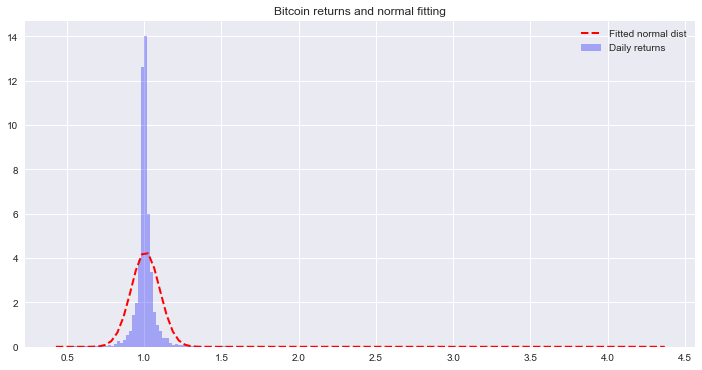

In [10]:
# Trying to fit the returns to a normal distribution 

from scipy.stats import norm

parameters = norm.fit(bitcoin.Returns)

# now, parameters[0] and parameters[1] are the mean and 
# the standard deviation of the fitted distribution
x = np.linspace(min(bitcoin.Returns), max(bitcoin.Returns), 100)

# Generate the pdf (fitted distribution)
fitted_pdf = norm.pdf(x,loc = parameters[0],scale = parameters[1])
# Generate the pdf (normal distribution non fitted)
normal_pdf = norm.pdf(x)

# Type help(plot) for a ton of information on pyplot
plt.plot(x,fitted_pdf,"red",label="Fitted normal dist",linestyle="dashed", linewidth=2)
# plt.plot(x,normal_pdf,"blue",label="Normal dist", linewidth=2)
plt.hist(bitcoin.Returns,normed=1,color="b",alpha=.3, bins=200, label='Daily returns') #alpha, from 0 (transparent) to 1 (opaque)
plt.title("Bitcoin returns and normal fitting")
# insert a legend in the plot (using label)
plt.legend()
# plt.yscale('log')
plt.show()

In [11]:
datetime.date.today()

datetime.date(2018, 2, 26)

In [13]:
datetime.datetime(2018, 1, 22)

datetime.datetime(2018, 1, 22, 0, 0)

In [14]:
index_past = pd.date_range(start=datetime.datetime(2018, 1, 22), end=datetime.date.today())
index_past

DatetimeIndex(['2018-01-22', '2018-01-23', '2018-01-24', '2018-01-25',
               '2018-01-26', '2018-01-27', '2018-01-28', '2018-01-29',
               '2018-01-30', '2018-01-31', '2018-02-01', '2018-02-02',
               '2018-02-03', '2018-02-04', '2018-02-05', '2018-02-06',
               '2018-02-07', '2018-02-08', '2018-02-09', '2018-02-10',
               '2018-02-11', '2018-02-12', '2018-02-13', '2018-02-14',
               '2018-02-15', '2018-02-16', '2018-02-17', '2018-02-18',
               '2018-02-19', '2018-02-20', '2018-02-21', '2018-02-22',
               '2018-02-23', '2018-02-24', '2018-02-25', '2018-02-26'],
              dtype='datetime64[ns]', freq='D')

In [16]:
index_future = pd.date_range(start=datetime.date.today(), end='2018-12-31')
index_future.shape

(309,)

In [22]:
bitcoin.Returns.loc[:datetime.datetime(2018, 1, 22)].tail()

Date
2018-01-18    1.001148
2018-01-19    1.030982
2018-01-20    1.109547
2018-01-21    0.903472
2018-01-22    0.936328
Freq: D, Name: Returns, dtype: float64

In [23]:
num_random_walks = 100000

np.random.seed(1234)
simulated_returns_bitcoin = np.random.choice(bitcoin.Returns.loc[:datetime.datetime(2018, 1, 22)], 
                                             size=(len(index_past), num_random_walks))
sim_bitcoin_returns = pd.DataFrame(data=simulated_returns_bitcoin, index=index_past)
sim_bitcoin_returns.iloc[0, :] = 1

In [24]:
sim_bitcoin_returns.iloc[:10, :10]

,0,1,2,3,4,5,6,7,8,9
2018-01-22,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2018-01-23,1.115486,0.987933,1.086957,1.000000,0.976086,1.004764,1.006949,1.035227,1.008857,0.928442
2018-01-24,0.996388,0.977168,0.988209,1.004764,0.979168,0.977036,1.148784,1.031461,1.042212,1.046131
2018-01-25,0.994008,1.009128,0.950000,0.992574,0.996644,1.064959,0.920550,1.006930,1.025122,0.996236
2018-01-26,0.990368,0.960000,0.999231,0.964912,1.004555,1.041611,0.884066,0.998913,1.023974,1.027398
2018-01-27,0.973655,1.027824,1.000000,0.975936,1.051273,1.035032,1.035950,1.036036,0.950000,1.015978
2018-01-28,1.012674,1.006051,1.030097,1.002006,0.999562,1.039702,0.996815,1.069746,1.182283,0.997468
2018-01-29,0.913742,0.988510,0.954439,0.996734,1.006036,1.023256,1.003260,0.947827,1.078325,1.007797
2018-01-30,0.999817,1.124793,1.019351,1.085315,1.012036,1.075716,1.001334,0.935285,1.013765,1.000000
2018-01-31,1.009302,1.030278,0.980002,1.003109,1.001298,1.016794,0.976088,0.986154,0.993701,1.061293


In [25]:
cum_sim_bitcoin = sim_bitcoin_returns.cumprod(axis=0)
cum_sim_bitcoin.shape

(36, 100000)

In [26]:
cum_sim_bitcoin.iloc[:10, :10]

,0,1,2,3,4,5,6,7,8,9
2018-01-22,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2018-01-23,1.115486,0.987933,1.086957,1.000000,0.976086,1.004764,1.006949,1.035227,1.008857,0.928442
2018-01-24,1.111456,0.965376,1.074141,1.004764,0.955752,0.981691,1.156767,1.067796,1.051443,0.971272
2018-01-25,1.104796,0.974188,1.020434,0.997303,0.952545,1.045461,1.064862,1.075196,1.077858,0.967616
2018-01-26,1.094155,0.935220,1.019649,0.962310,0.956884,1.088964,0.941408,1.074027,1.103698,0.994126
2018-01-27,1.065330,0.961242,1.019649,0.939153,1.005946,1.127113,0.975251,1.112730,1.048513,1.010010
2018-01-28,1.078832,0.967059,1.050338,0.941037,1.005506,1.171861,0.972145,1.190339,1.239639,1.007453
2018-01-29,0.985774,0.955948,1.002483,0.937964,1.011575,1.199114,0.975314,1.128236,1.336735,1.015308
2018-01-30,0.985594,1.075244,1.021883,1.017986,1.023750,1.289905,0.976616,1.055222,1.355134,1.015308
2018-01-31,0.994762,1.107800,1.001447,1.021151,1.025079,1.311567,0.953263,1.040611,1.346598,1.077540


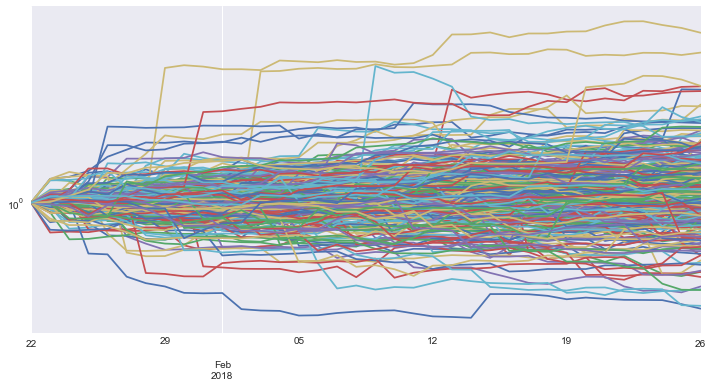

In [29]:
cum_sim_bitcoin.iloc[:, :300].plot(legend=False, logy=True)
# plt.legend(False)

In [41]:
future = pd.DataFrame(data=cum_sim_bitcoin, index=index_past)
future = future * bitcoin['Close'][-1]

In [42]:
future.iloc[:10, :10]

,0,1,2,3,4,5,6,7,8,9
2018-01-22,10344.140000,10344.140000,10344.140000,10344.140000,10344.140000,10344.140000,10344.140000,10344.140000,10344.140000,10344.140000
2018-01-23,11538.738845,10219.313642,11243.630435,10344.140000,10096.767224,10393.421492,10416.021763,10708.535841,10435.754767,9603.928898
2018-01-24,11497.061254,9985.983542,11111.060825,10393.421492,9886.435950,10154.751582,11965.758906,11045.433598,10876.272333,10046.968994
2018-01-25,11428.169135,10077.136917,10555.507784,10316.242620,9853.259990,10814.397641,11015.079818,11121.973945,11149.509830,10009.151043
2018-01-26,11318.088882,9674.051441,10547.395573,9954.269194,9898.138434,11264.398250,9738.053624,11109.882740,11416.804903,10283.380257
2018-01-27,11019.917495,9943.224760,10547.395573,9714.730269,10405.649325,11659.010928,10088.135353,11510.238875,10845.964658,10447.683811
2018-01-28,11159.588018,10003.395560,10864.841459,9734.220581,10401.095430,12121.894651,10056.005014,12313.036873,12823.003972,10421.233978
2018-01-29,10196.986968,9888.458579,10369.826798,9702.429924,10463.871553,12403.799178,10088.787426,11670.626760,13827.368915,10502.488283
2018-01-30,10195.123951,11122.472832,10570.496179,10530.189680,10589.814689,13342.960335,10102.247865,10915.366834,14017.700581,10502.488283
2018-01-31,10289.962314,11459.233994,10359.105739,10562.929592,10603.560458,13567.037007,9860.685439,10764.230985,13929.402757,11146.220701


In [43]:
possible_prices = future.iloc[-1, :]
possible_prices.name = 'Possible price'

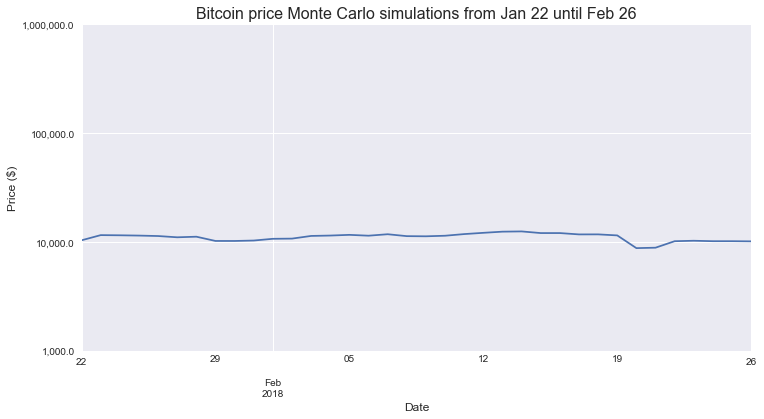

In [44]:
future.iloc[:, :1].plot(legend=False, logy=True, grid=True);
yticks = plt.yticks()[0][1:-1]
yticks = np.logspace(3, 6, 4)
plt.yticks(yticks, ['{:,}'.format(t) for t in yticks])
plt.title('Bitcoin price Monte Carlo simulations from Jan 22 until Feb 26', size=16)
plt.ylabel('Price ($)', size=12)
plt.xlabel('Date', size=12);
# plt.ylim(min(np.log10(future.iloc[:, :1000])), max(np.log10(future.iloc[:, :1000])))

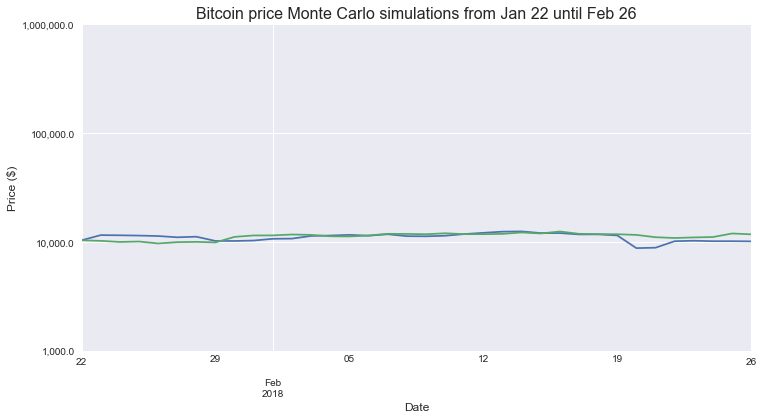

In [45]:
future.iloc[:, :2].plot(legend=False, logy=True, grid=True);
yticks = plt.yticks()[0][1:-1]
yticks = np.logspace(3, 6, 4)
plt.yticks(yticks, ['{:,}'.format(t) for t in yticks])
plt.title('Bitcoin price Monte Carlo simulations from Jan 22 until Feb 26', size=16)
plt.ylabel('Price ($)', size=12)
plt.xlabel('Date', size=12);
# plt.ylim(min(np.log10(future.iloc[:, :1000])), max(np.log10(future.iloc[:, :1000])))

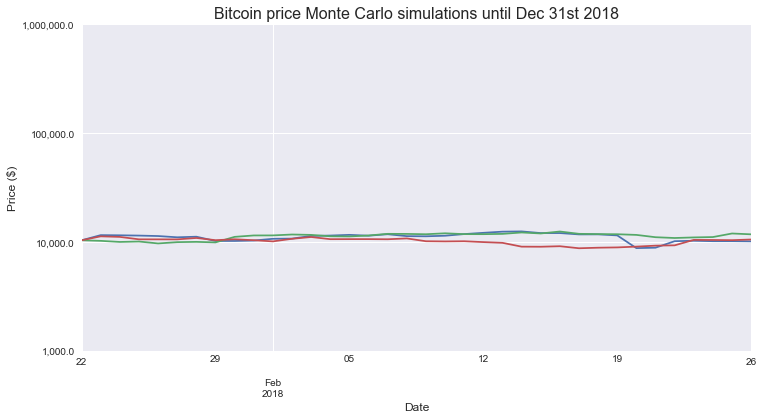

In [46]:
future.iloc[:, :3].plot(legend=False, logy=True, grid=True);
yticks = plt.yticks()[0][1:-1]
yticks = np.logspace(3, 6, 4)
plt.yticks(yticks, ['{:,}'.format(t) for t in yticks])
plt.title('Bitcoin price Monte Carlo simulations until Dec 31st 2018', size=16)
plt.ylabel('Price ($)', size=12)
plt.xlabel('Date', size=12);
# plt.ylim(min(np.log10(future.iloc[:, :1000])), max(np.log10(future.iloc[:, :1000])))

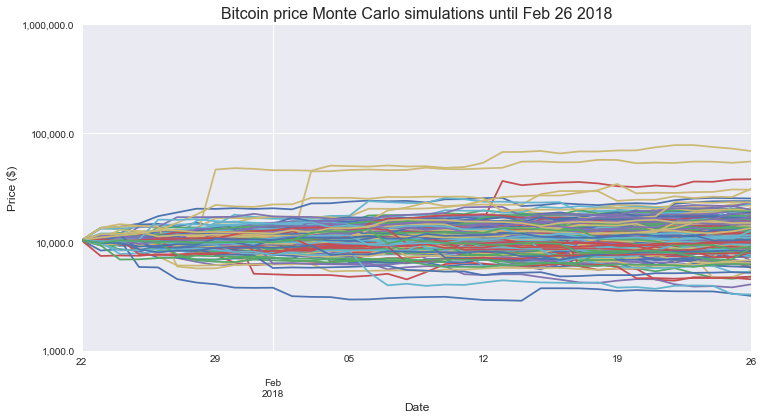

In [65]:
future.iloc[:, :200].plot(legend=False, logy=True, grid=True);
yticks = plt.yticks()[0][1:-1]
yticks = np.logspace(3, 6, 4)
plt.yticks(yticks, ['{:,}'.format(t) for t in yticks])
plt.title('Bitcoin price Monte Carlo simulations until Feb 26 2018', size=16)
plt.ylabel('Price ($)', size=12)
plt.xlabel('Date', size=12);
# plt.ylim(min(np.log10(future.iloc[:, :1000])), max(np.log10(future.iloc[:, :1000])))

In [48]:
mean_geom_return = (bitcoin.Close[-1] / bitcoin.Close[0]) ** (1 / len(bitcoin))

mean_geom_return

1.0044129277041107

In [49]:
bitcoin.Close[0]

0.049509999999999998

In [50]:
bitcoin.Close[-1]

10344.139999999999

In [51]:
bitcoin.Close[0] * mean_geom_return ** len(bitcoin)

10344.139999998024

In [52]:
geom_evolution_future = pd.Series([mean_geom_return ** n for n in np.arange(len(index_future))], 
                                  index=index_future)
geom_evolution_future.head()

2018-02-26    1.000000
2018-02-27    1.004413
2018-02-28    1.008845
2018-03-01    1.013297
2018-03-02    1.017769
Freq: D, dtype: float64

In [53]:
price_geom_evolution_future = geom_evolution_future * bitcoin.Close[-1]
price_geom_evolution_future.tail()

2018-12-27    39448.611093
2018-12-28    39622.694962
2018-12-29    39797.547050
2018-12-30    39973.170748
2018-12-31    40149.569461
Freq: D, dtype: float64

In [54]:
price_geom_evolution_future.head()

2018-02-26    10344.140000
2018-02-27    10389.787942
2018-02-28    10435.637325
2018-03-01    10481.689038
2018-03-02    10527.943974
Freq: D, dtype: float64

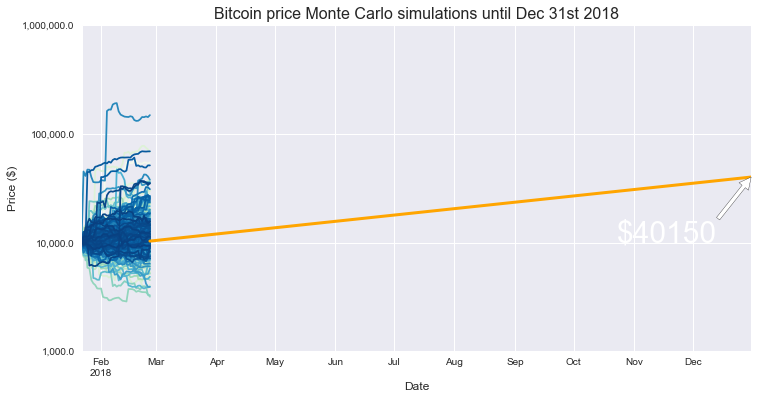

In [55]:
future.iloc[:, :400].plot(legend=False, logy=True, grid=True, colormap='GnBu');
price_geom_evolution_future.plot(logy=True, color='orange', linewidth=3)
yticks = plt.yticks()[0][1:-1]
yticks = np.logspace(3, 6, 4)
plt.yticks(yticks, ['{:,}'.format(t) for t in yticks])
plt.title('Bitcoin price Monte Carlo simulations until Dec 31st 2018', size=16)
plt.ylabel('Price ($)', size=12)
plt.xlabel('Date', size=12);
plt.annotate('${}'.format(int(round(price_geom_evolution_future.tail(1)))), 
            xy=(index_future[-1], price_geom_evolution_future.tail(1)), 
            xytext=(index_future[-70], 10000),
            arrowprops=dict(facecolor='white', shrink=0.0),
            size=30,
            color='white')
# plt.ylim(min(np.log10(future.iloc[:, :1000])), max(np.log10(future.iloc[:, :1000])))

plt.show()

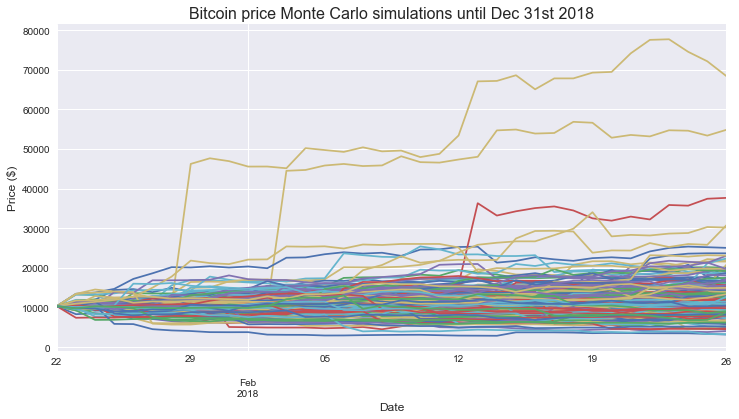

In [56]:
future.iloc[:, :200].plot(legend=False, logy=False, grid=True);
plt.title('Bitcoin price Monte Carlo simulations until Dec 31st 2018', size=16)
plt.ylabel('Price ($)', size=12)
plt.xlabel('Date', size=12);

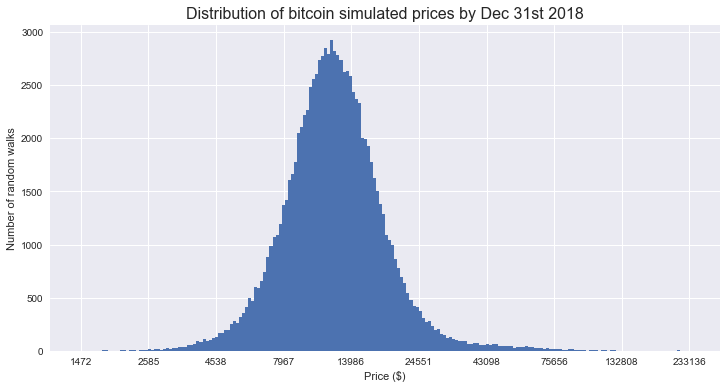

In [57]:
y, x, _ = plt.hist(np.log(possible_prices), bins=200);
xticks = plt.xticks()
ticks = np.linspace(min(np.log(possible_prices)), max(np.log(possible_prices)), 10)
plt.xticks(ticks, [str(int(np.exp(tick))) for tick in ticks]);

plt.xlabel('Price ($)')
plt.ylabel('Number of random walks')
plt.title('Distribution of bitcoin simulated prices by Dec 31st 2018', size=16);

In [58]:
from scipy.stats import gaussian_kde

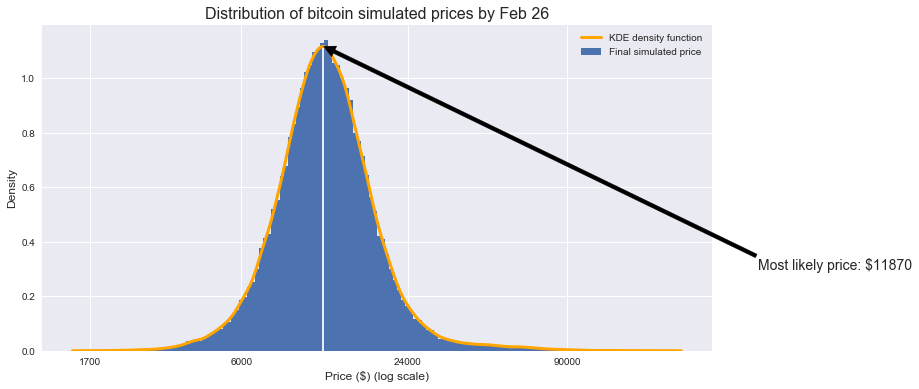

In [61]:
# More logical ticks

bins = 200


# Plot histogram of final simulated prices
fig, ax = plt.subplots()
ax.hist(np.log(possible_prices), bins=150, density=True, label='Final simulated price');
xticks = plt.xticks()
hand_ticks = [100, 400, 1700, 6000, 24000, 90000, 340000, 1200000, 5000000, 18000000]
# plt.xticks(np.log(hand_ticks), [str(tick) for tick in hand_ticks]);
ax.set_xticks(np.log(hand_ticks))
ax.set_xticklabels([str(tick) for tick in hand_ticks])

# Plot KDE function
kde = gaussian_kde(np.log(possible_prices))
x = np.linspace(min(np.log(possible_prices)), max(np.log(possible_prices)), bins)
ax.plot(x, kde.pdf(x), linewidth=3, c='orange', alpha=1, label='KDE density function')

# Plot vertical line at the most likely price
most_likely_price = np.exp(x[np.argmax(kde.pdf(x))])
# most_likely_price = possible_prices.quantile(0.5)
ax.vlines(np.log(most_likely_price), 0, kde.pdf(np.log(most_likely_price)), color='w')

# Draw annotation
ax.annotate('Most likely price: ${}'.format(int(round(most_likely_price))), 
            xy=(np.log(most_likely_price), kde.pdf(np.log(most_likely_price))), 
            xytext=(13, 0.3),
            arrowprops=dict(facecolor='black', shrink=0.0),
            size=14)

plt.legend()

plt.xlabel('Price ($) (log scale)', size=12)
plt.ylabel('Density', size=12)
plt.title('Distribution of bitcoin simulated prices by Feb 26', size=16)


plt.show()

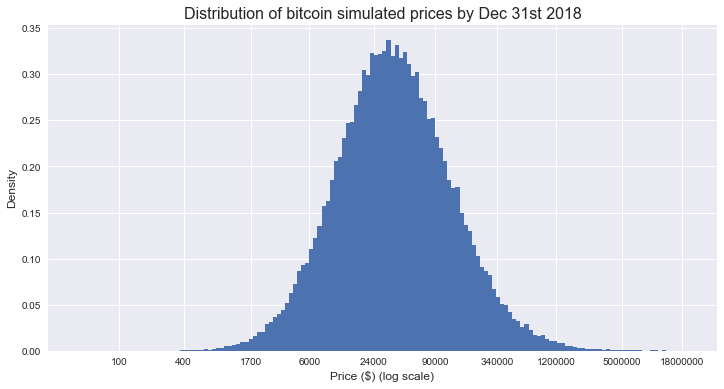

In [123]:
# More logical ticks

fig, ax = plt.subplots()
ax.hist(np.log(possible_prices), bins=150, density=True);
xticks = plt.xticks()
hand_ticks = [100, 400, 1700, 6000, 24000, 90000, 340000, 1200000, 5000000, 18000000]
# plt.xticks(np.log(hand_ticks), [str(tick) for tick in hand_ticks]);
ax.set_xticks(np.log(hand_ticks))
ax.set_xticklabels([str(tick) for tick in hand_ticks])

# # Plot KDE function
# kde = gaussian_kde(np.log(possible_prices))
# x = np.linspace(min(np.log(possible_prices)), max(np.log(possible_prices)), bins)
# ax.plot(x, kde.pdf(x), linewidth=2, c='orange', alpha=1)

# # # Plot vertical line at the most likely price
# most_likely_price = np.exp(x[np.argmax(kde.pdf(x))])
# # most_likely_price = possible_prices.quantile(0.5)
# ax.vlines(np.log(most_likely_price), 0, kde.pdf(np.log(most_likely_price)), color='w')

# # Draw annotation
# ax.annotate('Most likely price: ${}'.format(int(round(most_likely_price))), 
#             xy=(np.log(most_likely_price), kde.pdf(np.log(most_likely_price))), 
#             xytext=(13, 0.3),
#             arrowprops=dict(facecolor='black', shrink=0.0),
#             size=14)


plt.xlabel('Price ($) (log scale)', size=12)
plt.ylabel('Density', size=12)
plt.title('Distribution of bitcoin simulated prices by Dec 31st 2018', size=16)


plt.show()

In [77]:
most_likely_price

31792.133315058745

In [78]:
possible_prices.quantile(0.5)

35915.215678119785

In [79]:
possible_prices.quantile(0.05)

4995.794967798595

In [80]:
possible_prices.quantile(0.95)

297390.7067283761

In [81]:
# 80% confidence interval

possible_prices.quantile(.1), possible_prices.quantile(.9)

(7829.208433537955, 181753.79873907016)

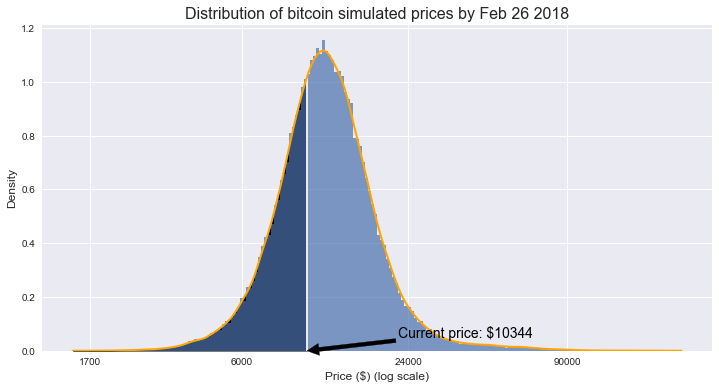

In [62]:
# More logical ticks

fig, ax = plt.subplots()
ax.hist(np.log(possible_prices), bins=200, density=True, alpha=0.7);
xticks = plt.xticks()
hand_ticks = [100, 400, 1700, 6000, 24000, 90000, 340000, 1200000, 5000000, 18000000]
# plt.xticks(np.log(hand_ticks), [str(tick) for tick in hand_ticks]);
ax.set_xticks(np.log(hand_ticks))
ax.set_xticklabels([str(tick) for tick in hand_ticks])

# Plot KDE function
kde = gaussian_kde(np.log(possible_prices))
x = np.linspace(min(np.log(possible_prices)), max(np.log(possible_prices)), bins)
ax.plot(x, kde.pdf(x), linewidth=2, c='orange', alpha=1)

# Plot vertical line at today's price
current_price = bitcoin.Close[-1]
ax.vlines(np.log(current_price), 0, kde.pdf(np.log(current_price)), color='w')

# Draw annotation
ax.annotate('Current price: ${}'.format(int(round(current_price))), 
            xy=(np.log(current_price), 0), 
            xytext=(10, 0.05),
            arrowprops=dict(facecolor='black', shrink=0.0),
            size=14, 
            color='black')

# Plot area below current price
x_fill = np.linspace(min(np.log(possible_prices)), np.log(current_price), bins)
ax.fill_between(x_fill, kde.pdf(x_fill), color='black')


plt.xlabel('Price ($) (log scale)', size=12)
plt.ylabel('Density', size=12)
plt.title('Distribution of bitcoin simulated prices by Feb 26 2018', size=16)

plt.show()

In [64]:
# Probability that bitcoin's price by Feb 26 is $10.3K, starting from the price by Jan 22

kde.integrate_box(0, np.log(bitcoin.Close[-1])) * 100

34.19376911753089

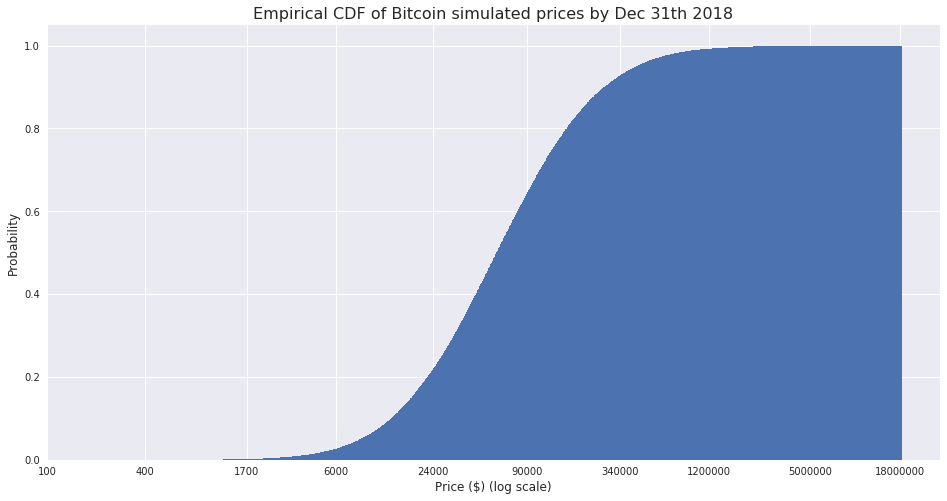

In [302]:
# More logical ticks

fig, ax = plt.subplots()
ax.hist(np.log(possible_prices), bins=2000, density=True, cumulative=True);
xticks = plt.xticks()
hand_ticks = [100, 400, 1700, 6000, 24000, 90000, 340000, 1200000, 5000000, 18000000]
# plt.xticks(np.log(hand_ticks), [str(tick) for tick in hand_ticks]);
ax.set_xticks(np.log(hand_ticks))
ax.set_xticklabels([str(tick) for tick in hand_ticks])


# # Plot vertical line at the most likely price
# most_likely_price = np.exp(x[np.argmax(kde.pdf(x))])
# ax.vlines(np.log(most_likely_price), 0, kde.pdf(np.log(most_likely_price)), color='w')

# # Draw annotation
# ax.annotate('Most likely price: ${} per bitcoin'.format(int(round(most_likely_price))), 
#             xy=(np.log(most_likely_price), kde.pdf(np.log(most_likely_price))), 
#             xytext=(13, 0.3),
#             arrowprops=dict(facecolor='black', shrink=0.0),
#             size=14)


plt.xlabel('Price ($) (log scale)', size=12)
plt.ylabel('Probability', size=12)
plt.title('Empirical CDF of Bitcoin simulated prices by Dec 31st 2018', size=16)

plt.show()

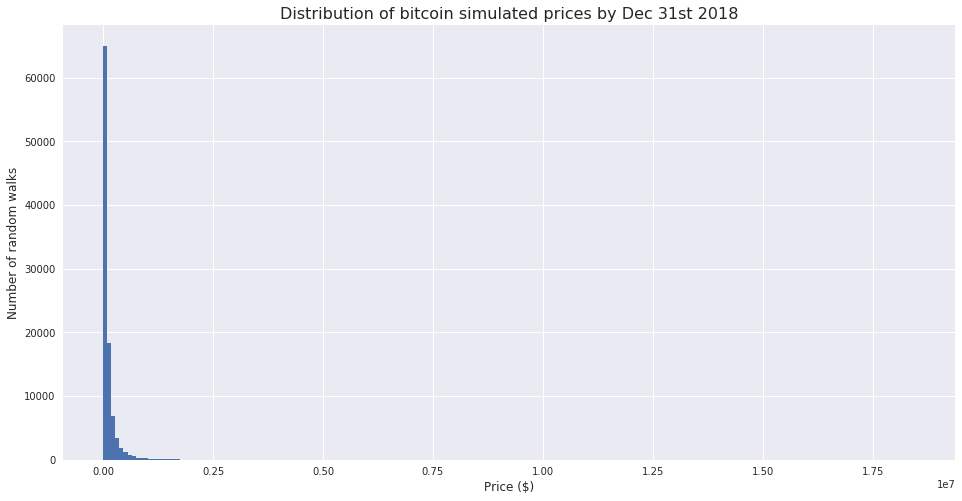

In [374]:
fig, ax = plt.subplots()
ax.hist(possible_prices, bins=200, density=False);
# xticks = plt.xticks()
# hand_ticks = [100, 400, 1700, 6000, 24000, 90000, 340000, 1200000, 5000000, 18000000]
# # plt.xticks(np.log(hand_ticks), [str(tick) for tick in hand_ticks]);
# ax.set_xticks(np.log(hand_ticks))
# ax.set_xticklabels([str(tick) for tick in hand_ticks])

# kde = gaussian_kde(np.log(possible_prices))
# x = np.linspace(min(np.log(possible_prices)), max(np.log(possible_prices)), bins)
# ax.plot(x, kde.pdf(x))


plt.xlabel('Price ($)', size=12)
plt.ylabel('Number of random walks', size=12)
plt.title('Distribution of bitcoin simulated prices by Dec 31st 2018', size=16)

plt.show()

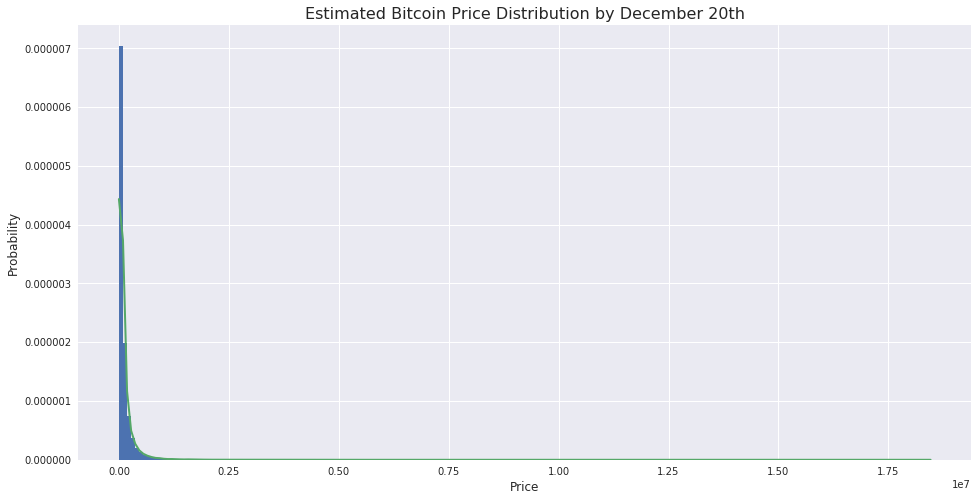

In [304]:
kde = stats.gaussian_kde(possible_prices)

fig, ax = plt.subplots(1, 1)

bins = 200

ax.hist(possible_prices, bins=bins, density=True);

xd = np.linspace(min(possible_prices)-10, max(possible_prices)+10, bins)
ax.plot(xd, kde.pdf(xd), linewidth=2);

ax.set_xlabel('Price', size=12)
ax.set_ylabel('Probability', size=12)
ax.set_title('Estimated Bitcoin Price Distribution by December 20th', size=16);